Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


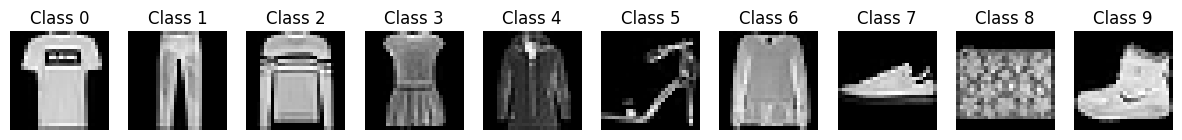

In [ ]:
from google.colab import drive
import numpy as np
import gzip
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

drive.mount('/content/drive')

# Function to read the MNIST image data
def read_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 28, 28)
    return data

# Function to read the MNIST label data
def read_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

drive_path = "/content/drive/My Drive//MNIST/"

# Load train and test images and labels
train_images = read_mnist_images(drive_path + 'train-images-idx3-ubyte.gz')
train_labels = read_mnist_labels(drive_path + 'train-labels-idx1-ubyte.gz')
test_images = read_mnist_images(drive_path + 't10k-images-idx3-ubyte.gz')
test_labels = read_mnist_labels(drive_path + 't10k-labels-idx1-ubyte.gz')

# Print one image from each class
classes = np.unique(train_labels)
num_classes = len(classes)
fig, axs = plt.subplots(1, num_classes, figsize=(15, 5))

for i, class_label in enumerate(classes):
    idx = np.where(train_labels == class_label)[0][0]
    image = train_images[idx]
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(f'Class {class_label}')
    axs[i].axis('off')

plt.show()


In [ ]:
# Reshape and normalize the image data
train_images = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images = test_images.reshape(test_images.shape[0], -1) / 255.0

# Print the shapes of the data arrays
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

# Concatenate train and test images and labels
combined_images = np.concatenate([train_images, test_images], axis=0)
combined_labels = np.concatenate([train_labels, test_labels], axis=0)

# Print the shapes of the combined data arrays
print("Combined Images Shape:", combined_images.shape)
print("Combined Labels Shape:", combined_labels.shape)


Train Images Shape: (60000, 784)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 784)
Test Labels Shape: (10000,)
Combined Images Shape: (70000, 784)
Combined Labels Shape: (70000,)


In [ ]:
# Trial run for N=5000 to check for the execution time
N = 5000

train_data = []
test_data = []

# Define k-nearest neighbors classifier with k = 20
knn_classifier = KNeighborsClassifier(n_neighbors=20, metric='euclidean')

# Class-wise selection
for class_label in range(10):
    # Shuffle indices of images belonging to the current class
    indices = np.arange(7000)
    np.random.shuffle(indices)

    # Select N indices for training and the rest for testing
    train_indices = indices[:N]
    test_indices = indices[N:]

    # Add selected indices to train and test data lists
    train_data.extend([(train_images[i], train_labels[i]) for i in train_indices if train_labels[i] == class_label])
    test_data.extend([(combined_images[i], combined_labels[i]) for i in test_indices if combined_labels[i] == class_label])

# Shuffle train and test data
np.random.shuffle(train_data)
np.random.shuffle(test_data)

# Split train and test data into images and labels
train_images_subset, train_labels_subset = zip(*train_data)
test_images_subset, test_labels_subset = zip(*test_data)

# Train the classifier
knn_classifier.fit(train_images_subset, train_labels_subset)

# Test the classifier
predictions = knn_classifier.predict(test_images_subset)

# accuracy
accuracy = accuracy_score(test_labels_subset, predictions)
print("Accuracy for N = 5000 :", accuracy)

Accuracy for N = 5000 : 0.800990099009901


In [ ]:
# 6 different values of N = 1000,2000,3000,4000,5000,6000
accuracies = []
times = []
chosen_N_values = []

# Define k-nearest neighbors classifier with k = 20
knn_classifier = KNeighborsClassifier(n_neighbors=20, metric='euclidean')

# Iterate over different values of N
for N in range(1000, 6001, 1000):
    train_data = []
    test_data = []

    # Class-wise selection
    for class_label in range(10):
        # Shuffle indices of images belonging to the current class
        indices = np.arange(7000)
        np.random.shuffle(indices)

        # Select N indices for training and the rest for testing
        train_indices = indices[:N]
        test_indices = indices[N:]

        # Add selected indices to train and test data lists
        train_data.extend([(train_images[i], train_labels[i]) for i in train_indices if train_labels[i] == class_label])
        test_data.extend([(combined_images[i], combined_labels[i]) for i in test_indices if combined_labels[i] == class_label])

    # Shuffle train and test data,
    np.random.shuffle(train_data),
    np.random.shuffle(test_data),

    # Split train and test data into images and labels
    train_images_subset, train_labels_subset = zip(*train_data)
    test_images_subset, test_labels_subset = zip(*test_data)

    # Train the classifier
    start_time = time.time()
    knn_classifier.fit(train_images_subset, train_labels_subset)
    training_time = time.time() - start_time

    # Test the classifier
    start_time = time.time()
    predictions = knn_classifier.predict(test_images_subset)
    testing_time = time.time() - start_time

    # Accuracy
    accuracy = accuracy_score(test_labels_subset, predictions)

    accuracies.append(accuracy)
    times.append(training_time + testing_time)
    chosen_N_values.append(N)

print("Chosen N values:", chosen_N_values)
print("Accuracies:", accuracies)
print("Times:", times)

Chosen N values: [1000, 2000, 3000, 4000, 5000, 6000]
Accuracies: [0.7382225192114935, 0.7739616613418531, 0.7833500501504513, 0.7931150860614242, 0.80811078140455, 0.8256611165523996]
Times: [1.6646225452423096, 1.2875275611877441, 1.383460283279419, 0.8409974575042725, 0.70644211769104, 0.4226052761077881]


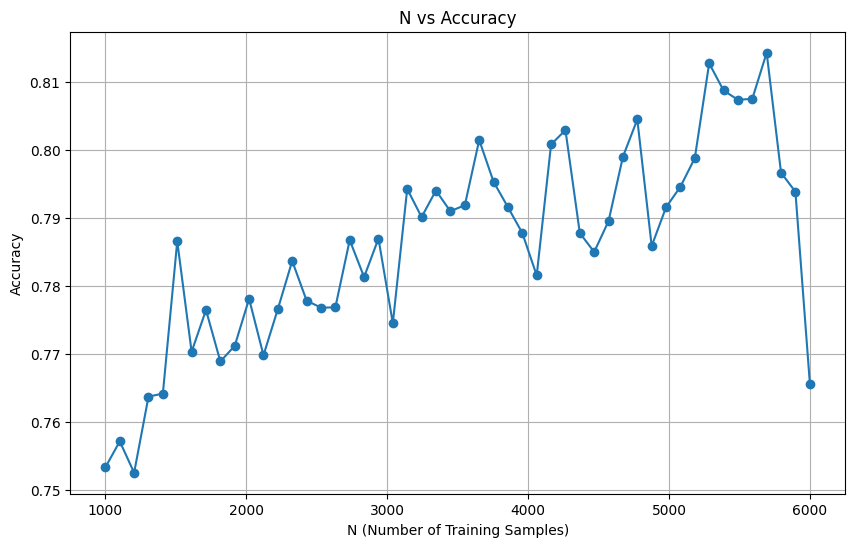

In [ ]:
# Defining 50 different N values to check the accuracy trend
num_N_values = 50

# Generate 50 different values of N
N_values = np.linspace(1000, 6000, num=num_N_values, dtype=int)

accuracies = []
chosen_N_values = []

# Define k-nearest neighbors classifier with k = 20
knn_classifier = KNeighborsClassifier(n_neighbors=20, metric='euclidean')

# Iterate over different values of N
for N in N_values:
    N = int(N)
    train_data = []
    test_data = []

    # Class-wise selection
    for class_label in range(10):
        # Shuffle indices of images belonging to the current class
        indices = np.arange(7000)
        np.random.shuffle(indices)

        # Select N indices for training and the rest for testing
        train_indices = indices[:N]
        test_indices = indices[N:]

        # Add selected indices to train and test data lists
        train_data.extend([(train_images[i], train_labels[i]) for i in train_indices if train_labels[i] == class_label])
        test_data.extend([(combined_images[i], combined_labels[i]) for i in test_indices if combined_labels[i] == class_label])

    # Shuffle train and test data
    np.random.shuffle(train_data)
    np.random.shuffle(test_data)

    # Split train and test data into images and labels
    train_images_subset, train_labels_subset = zip(*train_data)
    test_images_subset, test_labels_subset = zip(*test_data)

    # Train the classifier
    knn_classifier.fit(train_images_subset, train_labels_subset)

    # Test the classifier
    predictions = knn_classifier.predict(test_images_subset)

    accuracy = accuracy_score(test_labels_subset, predictions)
    accuracies.append(accuracy)
    chosen_N_values.append(N)

plt.figure(figsize=(10, 6))
plt.plot(chosen_N_values, accuracies, marker='o', linestyle='-')
plt.title('N vs Accuracy')
plt.xlabel('N (Number of Training Samples)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

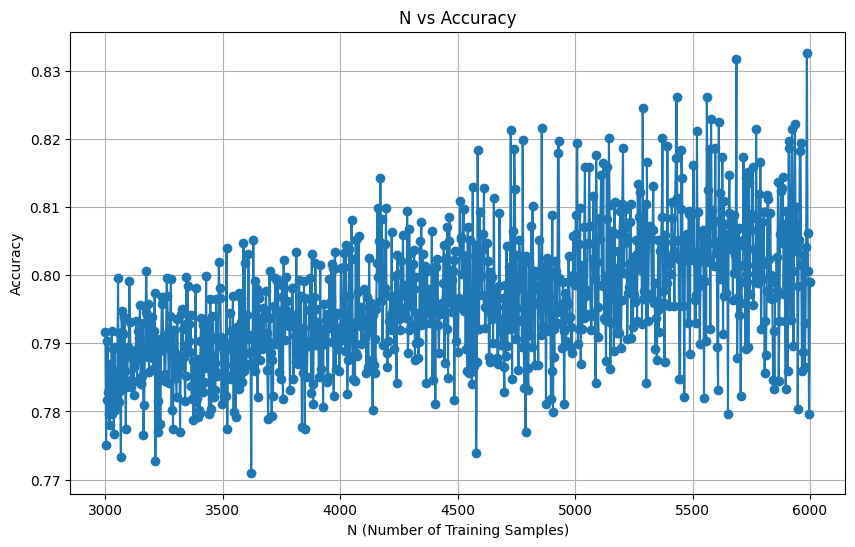

In [ ]:
# Defining 1000 different N values to check the accuracy trend in range 3000-6000
num_N_values = 1000

N_values = np.linspace(3000, 6000, num=num_N_values, dtype=int)

accuracies = []
chosen_N_values = []

# Define k-nearest neighbors classifier with k = 20
knn_classifier = KNeighborsClassifier(n_neighbors=20, metric='euclidean')

# Iterate over different values of N
for N in N_values:
    N = int(N)
    train_data = []
    test_data = []

    # Class-wise selection
    for class_label in range(10):
        # Shuffle indices of images belonging to the current class
        indices = np.arange(7000)
        np.random.shuffle(indices)

        # Select N indices for training and the rest for testing
        train_indices = indices[:N]
        test_indices = indices[N:]

        # Add selected indices to train and test data lists
        train_data.extend([(train_images[i], train_labels[i]) for i in train_indices if train_labels[i] == class_label])
        test_data.extend([(combined_images[i], combined_labels[i]) for i in test_indices if combined_labels[i] == class_label])

    # Shuffle train and test data
    np.random.shuffle(train_data)
    np.random.shuffle(test_data)

    # Split train and test data into images and labels
    train_images_subset, train_labels_subset = zip(*train_data)
    test_images_subset, test_labels_subset = zip(*test_data)

    # Train the classifier
    knn_classifier.fit(train_images_subset, train_labels_subset)

    # Test the classifier
    predictions = knn_classifier.predict(test_images_subset)

    accuracy = accuracy_score(test_labels_subset, predictions)
    accuracies.append(accuracy)
    chosen_N_values.append(N)

plt.figure(figsize=(10, 6))
plt.plot(chosen_N_values, accuracies, marker='o', linestyle='-')
plt.title('N vs Accuracy')
plt.xlabel('N (Number of Training Samples)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Number of runs to find Optimal N is 3000
num_N_values = 3000

N_values = np.linspace(3000, 6000, num=num_N_values, dtype=int)

accuracies = []
chosen_N_values = []

# k-nearest neighbors classifier with k = 20 with standard Euclidean metric
knn_classifier = KNeighborsClassifier(n_neighbors=20, metric='euclidean')

# Iterate over different values of N
for N in N_values:
    N = int(N)
    train_data = []
    test_data = []

    # Class-wise selection
    for class_label in range(10):
        # Shuffle indices of images belonging to the current class
        indices = np.arange(7000)
        np.random.shuffle(indices)

        # Select N indices for training and the rest for testing
        train_indices = indices[:N]
        test_indices = indices[N:]

        # Add selected indices to train and test data lists
        train_data.extend([(train_images[i], train_labels[i]) for i in train_indices if train_labels[i] == class_label])
        test_data.extend([(combined_images[i], combined_labels[i]) for i in test_indices if combined_labels[i] == class_label])

    # Shuffle train and test data
    np.random.shuffle(train_data)
    np.random.shuffle(test_data)

    # Split train and test data into images and labels
    train_images_subset, train_labels_subset = zip(*train_data)
    test_images_subset, test_labels_subset = zip(*test_data)

    # Train the classifier
    knn_classifier.fit(train_images_subset, train_labels_subset)

    # Test the classifier
    predictions = knn_classifier.predict(test_images_subset)

    accuracy = accuracy_score(test_labels_subset, predictions)
    accuracies.append(accuracy)
    chosen_N_values.append(N)

top_6_indices = np.argsort(accuracies)[::-1][:6]

# Print the top 6 optimal N values and their accuracies
print("Top 6 Optimal N and Metrics:")
for idx in top_6_indices:
    print("N =", chosen_N_values[idx])
    print("Accuracy:", accuracies[idx])

Top 6 Optimal N and Metrics:
N = 5559
Accuracy: 0.8439667128987517
N = 5968
Accuracy: 0.8326885880077369
N = 5839
Accuracy: 0.8288726682887266
N = 4829
Accuracy: 0.8276024493641074
N = 5733
Accuracy: 0.8269817073170732
N = 5990
Accuracy: 0.8265895953757225




Top 6 Optimal N and Metrics:

N = 5845 Accuracy: 0.833044982698962

N = 5846 Accuracy: 0.8323353293413174

N = 5617 Accuracy: 0.8318903318903319

N = 5691 Accuracy: 0.8316524437548487

N = 5946 Accuracy: 0.8285198555956679

N = 5881 Accuracy: 0.828397212543554



Top 6 Optimal N and Metrics:

N = 5589 Accuracy: 0.835243553008596

N = 5880 Accuracy: 0.8345454545454546

N = 5974 Accuracy: 0.8333333333333334

N = 5968 Accuracy: 0.8312368972746331

N = 5417 Accuracy: 0.8298701298701299

N = 5695. Accuracy: 0.829518547750592




Top 6 Optimal N and Accuracies:

N = 5810 - Accuracy: 0.8373245251857968

N = 5739 - Accuracy: 0.8304

N = 5904 - Accuracy: 0.830101569713758

N = 5713 - Accuracy: 0.8264659270998416

N = 5967 - Accuracy: 0.8264540337711069

N = 5751 - Accuracy: 0.8253343823760818



Top 6 Optimal N and Accuracies:

N = 5940 - Accuracy: 0.8342541436464088

N = 5626 - Accuracy: 0.8308874912648497

N = 5536 - Accuracy: 0.8292847503373819

N = 5842 - Accuracy: 0.8280701754385965

N = 5633 - Accuracy: 0.827252419955324

N = 5856 - Accuracy: 0.826539462272333



Top 6 Optimal N and Accuracies:

N = 5877 - Accuracy: 0.8430286241920592

N = 5376 - Accuracy: 0.8350515463917526

N = 5907 - Accuracy: 0.8328557784145176

N = 5892 - Accuracy: 0.8293545534924845

N = 5850 - Accuracy: 0.8287243532560215

N = 5484 - Accuracy: 0.8266315095583389


In [ ]:
# Implementing Random Sampling with N=5810 (train test ratio 83:17)
N = 5810

accuracies = []
precisions = []
recalls = []
f1_scores = []
chosen_N_values = []
confusion_matrices = []

# Define k-nearest neighbors classifier with k = 20 with standard Euclidean metric
knn_classifier = KNeighborsClassifier(n_neighbors=20, metric='euclidean')

train_data = []
test_data = []

# Class-wise selection
for class_label in range(10):
    # Shuffle indices of images belonging to the current class
    indices = np.arange(7000)
    np.random.shuffle(indices)

    # Select N indices for training and the rest for testing
    train_indices = indices[:N]
    test_indices = indices[N:]

    # Add selected indices to train and test data lists
    train_data.extend([(train_images[i], train_labels[i]) for i in train_indices if train_labels[i] == class_label])
    test_data.extend([(combined_images[i], combined_labels[i]) for i in test_indices if combined_labels[i] == class_label])

# Shuffle train and test data
np.random.shuffle(train_data)
np.random.shuffle(test_data)

# Split train and test data into images and labels
train_images_subset, train_labels_subset = zip(*train_data)
test_images_subset, test_labels_subset = zip(*test_data)

# Train the classifier
knn_classifier.fit(train_images_subset, train_labels_subset)

# Test the classifier
predictions = knn_classifier.predict(test_images_subset)

accuracy = accuracy_score(test_labels_subset, predictions)
accuracies.append(accuracy)

precision = precision_score(test_labels_subset, predictions, average='weighted')
precisions.append(precision)

recall = recall_score(test_labels_subset, predictions, average='weighted')
recalls.append(recall)

f1 = f1_score(test_labels_subset, predictions, average='weighted')
f1_scores.append(f1)

cm = confusion_matrix(test_labels_subset, predictions)
confusion_matrices.append(cm)

chosen_N_values.append(N)

# Print the metrics for N=5810
print("Metrics for N=5810 with Random Sampling:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)


Metrics for N=5810 with Random Sampling:
Accuracy: 0.8058176100628931
Precision: 0.8091968841328421
Recall: 0.8058176100628931
F1 Score: 0.8048879697726563
Confusion Matrix:
 [[110   0   4   5   0   0   7   0   3   0]
 [  0 108   2   3   0   0   1   0   0   0]
 [  6   0  99   0  18   0  24   2   1   0]
 [  6   1   0 121   5   0   9   0   0   0]
 [  1   0  13   3  87   0  11   0   0   0]
 [  0   0   0   0   0  92   0  13   0  10]
 [ 32   0  21   4   9   0  63   0   1   1]
 [  0   0   0   0   0   0   0 114   0  13]
 [  0   0   2   4   3   0   2   1 105   2]
 [  0   0   0   0   0   1   1   2   0 126]]


In [ ]:
# Implementing Kennard-Stone algorithm with N=5810 (train test ratio 83:17)
def kennard_stone_split(data, labels, N_per_class):
    split_train_images = []
    split_train_labels = []
    split_test_images = []
    split_test_labels = []

    for class_label in np.unique(labels):
        class_indices = np.where(labels == class_label)[0]
        np.random.shuffle(class_indices)

        train_indices = class_indices[:N_per_class]
        test_indices = class_indices[N_per_class:N_per_class + 7000 - N_per_class]

        split_train_images.append(data[train_indices])
        split_train_labels.append(labels[train_indices])
        split_test_images.append(data[test_indices])
        split_test_labels.append(labels[test_indices])

    return np.concatenate(split_train_images), np.concatenate(split_train_labels), \
           np.concatenate(split_test_images), np.concatenate(split_test_labels)

# Using Kennard-Stone algorithm to split the data
N_per_class = 5810
train_images_kennard, train_labels_kennard, test_images_kennard, test_labels_kennard = \
    kennard_stone_split(combined_images, combined_labels, N_per_class)

# Train k-nearest neighbors classifier
classifier = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
classifier.fit(train_images_kennard, train_labels_kennard)

# Predict labels for test data
predicted_labels = classifier.predict(test_images_kennard)

accuracy = accuracy_score(test_labels_kennard, predicted_labels)
precision = precision_score(test_labels_kennard, predicted_labels, average='weighted')
recall = recall_score(test_labels_kennard, predicted_labels, average='weighted')
f1 = f1_score(test_labels_kennard, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(test_labels_kennard, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8496638655462185
Precision: 0.852739852882916
Recall: 0.8496638655462185
F1 Score: 0.8484115458528175
Confusion Matrix:
 [[1065    1   11   24    6    0   68    0   15    0]
 [   7 1143    7   24    2    0    7    0    0    0]
 [  12    0  943   11  117    0  104    1    2    0]
 [  52    6   11 1032   53    0   35    0    1    0]
 [   6    1  112   31  928    0  111    0    1    0]
 [   1    0    1    0    0  928    9  151    4   96]
 [ 247    1  138   22   96    0  669    0   17    0]
 [   0    0    0    0    0    4    0 1141    0   45]
 [   4    0   25    6   20    1   13    6 1110    5]
 [   0    0    0    0    0    1    1   36    0 1152]]


In [ ]:
# The best training set Selection method is Kennard-Stone algorithm
# Comparing the L1 norm with Euclidean distance

# Splitting data using Kennard-Stone algorithm
N_per_class = 5810
train_images_ks_manhattan, train_labels_ks_manhattan, test_images_ks_manhattan, test_labels_ks_manhattan = \
    kennard_stone_split(combined_images, combined_labels, N_per_class)

# Train KNN classifier with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=20, metric='manhattan')
knn_manhattan.fit(train_images_ks_manhattan, train_labels_ks_manhattan)

# Predict labels for test data using Manhattan distance
predicted_labels_manhattan = knn_manhattan.predict(test_images_ks_manhattan)

# Calculate accuracy using Manhattan distance
accuracy_manhattan = accuracy_score(test_labels_ks_manhattan, predicted_labels_manhattan)

train_images_ks_euclidean, train_labels_ks_euclidean, test_images_ks_euclidean, test_labels_ks_euclidean = \
    kennard_stone_split(combined_images, combined_labels, N_per_class)

# Train KNN classifier with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn_euclidean.fit(train_images_ks_euclidean, train_labels_ks_euclidean)

# Predict labels for test data using Euclidean distance
predicted_labels_euclidean = knn_euclidean.predict(test_images_ks_euclidean)

# Calculate accuracy using Euclidean distance
accuracy_euclidean = accuracy_score(test_labels_ks_euclidean, predicted_labels_euclidean)

print("Accuracy with Manhattan Distance:", accuracy_manhattan)
print("Accuracy with Euclidean Distance:", accuracy_euclidean)

Accuracy with Manhattan Distance: 0.8563025210084033
Accuracy with Euclidean Distance: 0.8451260504201681


In [ ]:
# The best training set Selection method is Kennard-Stone algorithm with classification metric as Manhattan

# Evaluation metrics for each class
precision_per_class = precision_score(test_labels_kennard, predicted_labels, average=None)
recall_per_class = recall_score(test_labels_kennard, predicted_labels, average=None)
f1_per_class = f1_score(test_labels_kennard, predicted_labels, average=None)

num_classes = len(np.unique(test_labels_kennard))
for class_label in range(num_classes):
    print("Class:", class_label)
    print("Precision:", precision_per_class[class_label])
    print("Recall:", recall_per_class[class_label])
    print("F1 Score:", f1_per_class[class_label])
    print()

# Global evaluation metrics
global_accuracy = accuracy_score(test_labels_kennard, predicted_labels)
precision_global = precision_score(test_labels_kennard, predicted_labels, average='weighted')
recall_global = recall_score(test_labels_kennard, predicted_labels, average='weighted')
f1_global = f1_score(test_labels_kennard, predicted_labels, average='weighted')

print("Global Metrics:")
print("Accuracy:", global_accuracy)
print("Precision:", precision_global)
print("Recall:", recall_global)
print("F1 Score:", f1_global)

Class: 0
Precision: 0.7639885222381636
Recall: 0.8949579831932774
F1 Score: 0.8243034055727555

Class: 1
Precision: 0.9921875
Recall: 0.9605042016806723
F1 Score: 0.9760888129803585

Class: 2
Precision: 0.7556089743589743
Recall: 0.7924369747899159
F1 Score: 0.7735849056603773

Class: 3
Precision: 0.8973913043478261
Recall: 0.8672268907563025
F1 Score: 0.882051282051282

Class: 4
Precision: 0.7594108019639935
Recall: 0.7798319327731092
F1 Score: 0.7694859038142621

Class: 5
Precision: 0.9935760171306209
Recall: 0.7798319327731092
F1 Score: 0.8738229755178908

Class: 6
Precision: 0.6578171091445427
Recall: 0.5621848739495798
F1 Score: 0.6062528318985049

Class: 7
Precision: 0.854681647940075
Recall: 0.9588235294117647
F1 Score: 0.9037623762376238

Class: 8
Precision: 0.9652173913043478
Recall: 0.9327731092436975
F1 Score: 0.9487179487179487

Class: 9
Precision: 0.8875192604006163
Recall: 0.9680672268907563
F1 Score: 0.9260450160771704

Global Metrics:
Accuracy: 0.8496638655462185
Precis